In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy import linalg

## Spectral Graph Partitioning

Let $G = (V,E)$ be a graph on vertices $V = [n] = \{1,2,\dots,n\}$ and let $A = (a_{ij})_{i,j\in [n]}$ denote its $n\times n$ adjacency matrix. Let $L = (\ell_{i,j})_{i,j\in[n]}$ denote its Laplacian.
The entries of these matrices are$$
a_{ij} = \begin{cases}
1&: i\sim j\\
0&:\text{ else}
\end{cases}\qquad\qquad\qquad \ell_{ij} = \begin{cases}
\delta(i) &: i=j\\
-1 &: i\sim j\\
0&:\text{ else}
\end{cases}.
$$


Recall that $L$ is symmetric and non-negative definite and so has a *spectral decomposition*:
$$
L = \sum_{i=1}^n \mu_i \mathbf{y}_i \mathbf{y}_i^T
$$
where $0\le \mu_1\le \mu_2\le\dotsm \le\mu_n$ are the eigenvalues and $\mathbf{y}_i$ is the corresponding eigenvector.

Note that $\delta(i) = \sum_{j\neq i } 1_{[i\sim j]} = \sum_{j\neq i} a_{ij} = \sum_{j\neq i}-\ell_{ij}$ and so $$\sum_{j=1}^n \ell_{ij} = 0$$ for all $i$.

What does this mean? Well it means that the vector $\boldsymbol{1} = (1,1,1,\dots,1)^T$ is an eigenvector with eigenvalue $0$:
$$
L \begin{bmatrix}
1\\1\\\vdots\\1
\end{bmatrix} = \begin{bmatrix}
\sum_{j=1}^n \ell_{1j}\\
\sum_{j=1}^n \ell_{2j}\\
\vdots\\
\sum_{j=1}^n \ell_{nj}
\end{bmatrix} = \boldsymbol{0}.
$$

**Lemma:** If $L$ is the Laplacian of a graph $G = (V,E)$ then $\mathbf{y}_1 = \frac{1}{\sqrt{n}} (1,1,\dotsm,1)^T$ is eigenvector.

Let's look at why this might be useful:
Below I'll plot a $4\times 7$ grid with a random layout. Then I'll plot one using something involving an eigenvecotr of $L$.

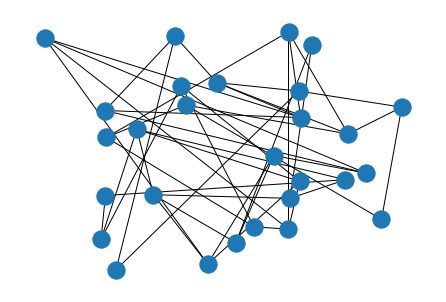

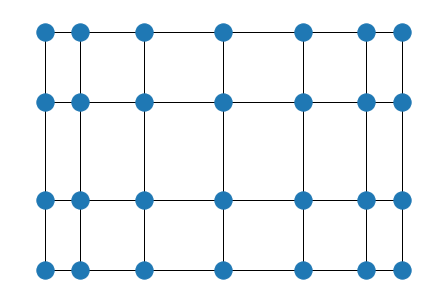

In [3]:
G = nx.grid_2d_graph(4,7)
nx.draw(G, pos=nx.random_layout(G))
plt.show()
nx.draw(G, pos=nx.spectral_layout(G))
plt.show()

array([[ 3.21855930e-02, -6.27572659e-02,  1.88982237e-01,
        -2.60560445e-01, -2.46917191e-01, -2.40794059e-01,
         3.40438627e-01,  9.01820275e-02, -5.94712212e-02,
        -3.14612599e-01,  2.08953253e-01, -1.15960307e-01,
         1.13084686e-01, -1.88982237e-01, -2.73010582e-01,
         2.60560445e-01, -1.66634659e-01,  2.40794059e-01,
        -1.66634659e-01,  7.77028950e-02,  1.30316805e-01,
        -2.17718674e-01,  1.15960307e-01,  1.02276449e-01,
        -2.08953253e-01, -1.41014296e-01, -1.51509442e-01,
        -5.94712212e-02],
       [-9.01820275e-02,  1.41014296e-01,  1.88982237e-01,
        -2.08953253e-01, -2.46917191e-01, -5.94712212e-02,
         2.73010582e-01, -1.30316805e-01,  1.66634659e-01,
        -7.77028950e-02, -1.15960307e-01,  2.60560445e-01,
        -6.27572659e-02, -1.88982237e-01,  1.51509442e-01,
         2.08953253e-01,  2.40794059e-01,  5.94712212e-02,
         2.40794059e-01, -2.17718674e-01,  3.21855930e-02,
         3.14612599e-01, -2.60

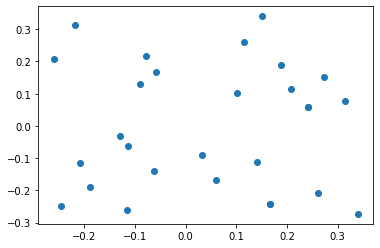

In [29]:
L = nx.laplacian_matrix(G).toarray()
(l, v) = np.linalg.eig(L)
plt.scatter(v[1][:],v[2][:])
v

**Lemma (Laplacian quadratic form):** Let $G$ be a graph with Laplacian $L$. Then for any $\mathbf{x} = (x_1,\dotsm,x_n)^T\in \mathbf{R}^n$:
$$
\langle \mathbf{x}, L\mathbf{x}\rangle = \mathbf{x}^T L \mathbf{x} = \sum_{e = \{i,j\}\in E} (x_i-x_j)^2
$$

*Proof*: Recall the orientented incidence matrix $B$ so that $L = BB^T$. We randomly direct the edges $E$ of $G$ and set
$$
b_{i,j} = \begin{cases}
-1 &: i\text{ is the source of }e_j\\
1&: i\text{ is the target of }e_j\\
0&: \text{else}
\end{cases}.
$$ Recall that the rows of $B$ are indexed by the vertices of $G$ and the columns are indexed by the edges. 

Then by computing $B^T\mathbf{x}$ we have the $j^\text{th}$ entry of $B^T\mathbf{x}$ (which indexes the edge $e_j$!) is
$$
\left(B^T \mathbf{x}\right)_j = \sum_{i=1}^n b_{i,j} x_i = x_u-x_v \text{ when }e_j = (u,v).
$$
But then
$$
\langle \mathbf{x}, L \mathbf{x}\rangle = \mathbf{x}^T BB^T \mathbf{x} = (B^T\mathbf{x})^T B^T\mathbf{x} = \|B^T\mathbf{x}\|^2\\
= \sum_{e = \{i,j\} \in E} (x_i-x_j)^2.
$$

**Lemma:** Suppose that $G$ is connected. Then the second smallest eigenvalue $\mu_2>0$. 

*Proof:* What does this mean? We want to show that in the spectral decomposition, there is at most one eigenvector which has $0$ as an eigenvalue. 
We know that $\mathbf{y}_1 = \frac{1}{\sqrt{n}}(1,1,\dots,1)^T$ is an eigenvector with eigenvalue $0$, and we want to show that that is the only such eigenvector up-to scalar multiplication.

That means we want to show that if $\mathbf{x}$ is an eigenvector with eigenvalue $0$ then $\mathbf{x} = (c,c,c,\dotsm,c)^T$ for some constant $c\neq 0$.

Let's use the previous lemma and assume that $\mathbf{x}$ is an eigenvector with eigenvalue $0$, then
$$
\mathbf{x}^T L\mathbf{x} = \mathbf{x}^T \boldsymbol{0} = 0
$$
and
$$
\mathbf{x}^T L\mathbf{x} = \sum_{e = \{i,j\}\in E} (x_i-x_j)^2.
$$

The second formula means that $0$ is the sum of a bunch of non-negative things, and so all of the non-negative things must be zero. That is
$$
(x_i - x_j)^2 = 0\text{  for all }i\sim j.
$$
In particular, if $i\sim j$, then $x_i = x_j$. 

Now let $u$ and $v$ be any two vertices in $G$. There is a path $u = i_0\sim i_1\sim \dotsm\sim i_k = v$ between $u$ and $v$ since $G$ is connected. So
$$
x_u = x_{i_0} = x_{i_1} = \dotsm = x_{i_{k}} = x_v
$$
and so $\mathbf{x} = (x_1,x_1,x_1,\dotsm,x_1)^T$.

If $G$ is disconnected we can relabel the vertices so that the connected componnents are $\{1,2,\dotsm, n_1\}$, $\{n_1+1,n_1+2,\dotsm, n_1+n_2\}$, $\dotsm$, $\{\sum_{i\le k-1} n_{i}+1,\sum_{i\le k-1} n_{i}+2,\dots, \sum_{i\le k-1} n_{i}+n_k\}$ where $\sum_{i=1}^k n_i = n$.

If $i$ and $j$ are in two distinct connected components then $i$ is not connected to $j$ by an edge. Then the Laplacian can be written in block form:
$$
L = \begin{bmatrix}
L_1 & 0_{n_1\times n_2} &\dotsm & 0_{n_1\times n_k}\\
0_{n_2\times n_1}& L_2 &\dotsm & 0_{n_2\times n_k}\\
\vdots &&\ddots &\vdots\\
0_{n_k\times n_1}&\dotsm & 0_{n_k\times n_{k-1}} & L_k
\end{bmatrix}\qquad L_j\in \mathbb{R}^{n_j\times n_j}.
$$
So it is not hard to see using the above lemma and properties of eigenvalues for matrices that the spectral decomposition of $L$ has $\mu_1=\mu_2=\dotsm=\mu_k = 0$. 

Let's look at a small example!
Below is a graph $G$ with three disjoint connected components (two are triangles, and one is a square).


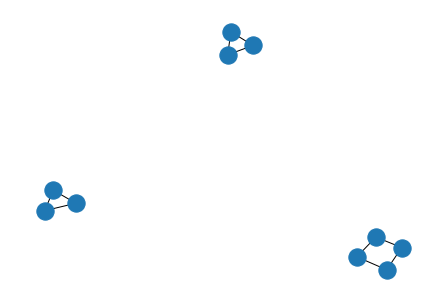

In [3]:
G = nx.disjoint_union(nx.disjoint_union(nx.cycle_graph(3), nx.cycle_graph(3)), nx.cycle_graph(4))
nx.draw(G)

Here is its Laplacian:

In [4]:
A = nx.laplacian_matrix(G).toarray()
print(A)

[[ 2 -1 -1  0  0  0  0  0  0  0]
 [-1  2 -1  0  0  0  0  0  0  0]
 [-1 -1  2  0  0  0  0  0  0  0]
 [ 0  0  0  2 -1 -1  0  0  0  0]
 [ 0  0  0 -1  2 -1  0  0  0  0]
 [ 0  0  0 -1 -1  2  0  0  0  0]
 [ 0  0  0  0  0  0  2 -1  0 -1]
 [ 0  0  0  0  0  0 -1  2 -1  0]
 [ 0  0  0  0  0  0  0 -1  2 -1]
 [ 0  0  0  0  0  0 -1  0 -1  2]]


Here are the eigenvalues:
(I use the ```np.linalg.eigvalsh``` instead of ```np.linalg.eigvals``` method because the Laplacian is symmetric (the ```h``` stands for *Hermitian* which is the complex matrix analog of symmetric). 

In [5]:
eigs = np.linalg.eigvalsh(A)
eigs

array([-8.58688121e-16, -1.11022302e-16, -1.11022302e-16,  2.00000000e+00,
        2.00000000e+00,  3.00000000e+00,  3.00000000e+00,  3.00000000e+00,
        3.00000000e+00,  4.00000000e+00])

Note that three of the eigenvalues are negative but $\approx 10^{-16}$. These are actually zero but are approximately zero because of some numeric errors in the computation.

**Lemma:** Suppose that $G$ is a graph and $\mu_1\le \mu_2\le\dotsm\le\mu_n$ are the eigenvalues of the Laplacian $L$. 
Then the number of connected components of $G$ is 
$$
\max\{k: \mu_k = 0\}.
$$